## 난 Pytorch를 굳이 쓰지 않지만, 일관성을 위해 일단 연습을 해본다.

### Iris 데이터와 pytorch api를 사용하여 모델을 만든 후 shap 로 해석하기

#### 먼가 다른 xgboost 에 사용되는 `dependence_plot`  , `force_plot` 사용해야 할 것 같은데, summary_plot 만 가능하고 나머지는 에러가 발생한다...

#### 원래는 image_plot 사용한다.

## [SHAP Document Url](https://github.com/slundberg/shap/blob/master/notebooks/deep_explainer/PyTorch%20Deep%20Explainer%20MNIST%20example.ipynb)

In [1]:

import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np
import shap

## Torch는 잘모르니, 일단 복붙

In [20]:
import sklearn.datasets

from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F


hl = 10
lr = 0.005
num_epoch = 1000


class Net(nn.Module):
    def __init__(self):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, hl)
        self.fc2 = nn.Linear(hl, 3)
        self.softmax = torch.nn.Softmax(dim=1)


    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

    
if __name__ == '__main__':
    iris = sklearn.datasets.load_iris()
    x, y = shuffle(iris.data,iris.target)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=33)

    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=lr)

    # train
    for epoch in range(num_epoch):
        trainx = torch.Tensor(xtrain).float()
        trainy = torch.Tensor(ytrain).long()

        optimizer.zero_grad()
        y_pred = net(trainx)
        loss = criterion(y_pred, trainy)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(loss) # cross entropy


    # test
    testx = torch.Tensor(xtest).float()
    testy = torch.Tensor(ytest).long()
    y_pred = net(testx)
    _, predicted = torch.max(y_pred, 1)

    acc = torch.sum(testy == predicted).numpy() / len(testx)
    print(acc)


tensor(1.1300, grad_fn=<NllLossBackward>)
tensor(0.7495, grad_fn=<NllLossBackward>)
tensor(0.6203, grad_fn=<NllLossBackward>)
tensor(0.5951, grad_fn=<NllLossBackward>)
tensor(0.5856, grad_fn=<NllLossBackward>)
tensor(0.5806, grad_fn=<NllLossBackward>)
tensor(0.5774, grad_fn=<NllLossBackward>)
tensor(0.5752, grad_fn=<NllLossBackward>)
tensor(0.5735, grad_fn=<NllLossBackward>)
tensor(0.5722, grad_fn=<NllLossBackward>)
0.9736842105263158


# 위에서 사용한 Class로 지정한 `model` 를 활용한다.

In [80]:
# since shuffle=True, this is a random sample of test data

background = trainx
test = testx.narrow(0, 0, 20)

e = shap.DeepExplainer(net, background  )
shap_values = e.shap_values(test)

In [81]:

shap_numpy = [np.swapaxes(np.swapaxes(s, 0, -1), 0, 1) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test.numpy(), 0, -1), 0, 1)

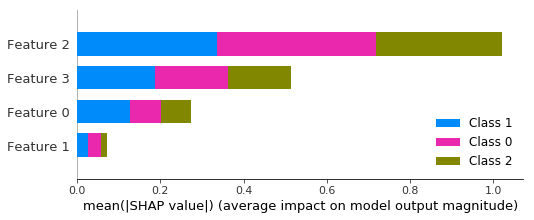

In [75]:
shap.summary_plot(shap_numpy, -test_numpy, plot_type="bar")

In [89]:
shap.force_plot(e.expected_value, shap_numpy[0], test_numpy[0])

TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'